In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import cross_validate

shap.initjs()

In [3]:
seed = 20

In [4]:
df = pd.read_csv('../data/artificial_train.data', sep=' ', header=None).drop(500, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [5]:
labels = pd.read_csv('../data/artificial_train.labels', header=None)[0].apply(lambda x: 0 if x == -1 else x)
labels.head()

0    0
1    0
2    0
3    1
4    1
Name: 0, dtype: int64

In [6]:
len(df), len(labels)

(2000, 2000)

In [7]:
best_cols = [64, 128, 451, 442, 281, 241, 493, 378]
df = df[best_cols]
df.head()

,64,128,451,442,281,241,493,378
0,648,452,463,568,517,434,485,419
1,488,473,474,463,435,551,338,526
2,485,487,481,503,535,474,650,464
3,415,493,472,447,526,569,572,553
4,387,475,472,536,456,538,435,424


In [8]:
model = RandomForestClassifier(**{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 20})
sc = cross_validate(model, df, labels, cv=5, scoring=make_scorer(balanced_accuracy_score), return_train_score=False)
np.mean(sc['test_score'])

0.898

In [9]:
model.fit(df, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [10]:
model.feature_importances_

array([0.10800004, 0.12943115, 0.10834967, 0.13387608, 0.1344136 ,
       0.12053984, 0.1244605 , 0.14092911])

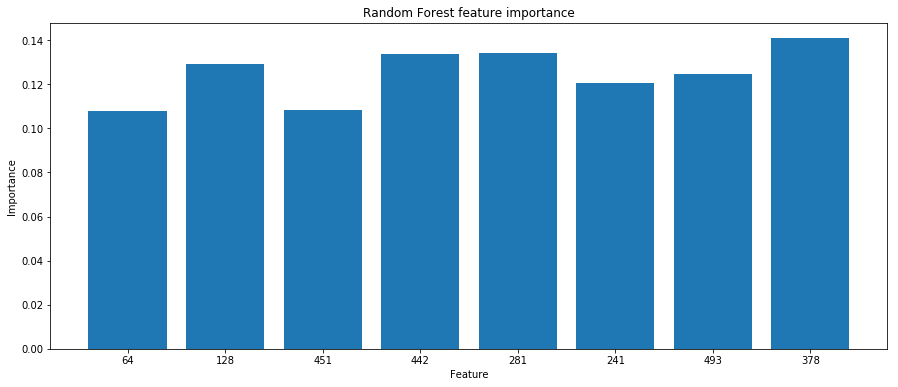

In [11]:
plt.figure(figsize=(15,6))
plt.bar(range(len(best_cols)), model.feature_importances_)
plt.xticks(range(len(best_cols)), best_cols)
plt.title('Random Forest feature importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = np.array(explainer.shap_values(df))

print(df.iloc[0, :].values)

[648 452 463 568 517 434 485 419]


In [13]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], df.iloc[0, :])#, matplotlib=True)

In [14]:
shap.force_plot(explainer.expected_value[1], shap_values[1][3, :], df.iloc[3, :])#, matplotlib=True)

In [15]:
shap.force_plot(explainer.expected_value[1], shap_values[1], df)

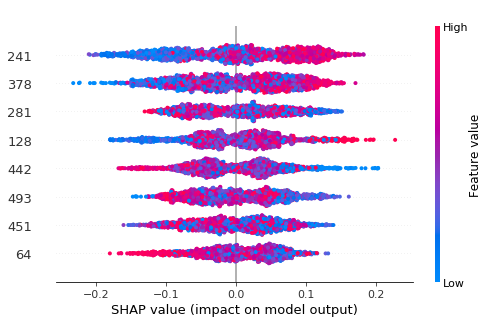

In [16]:
shap.summary_plot(shap_values[1], df)

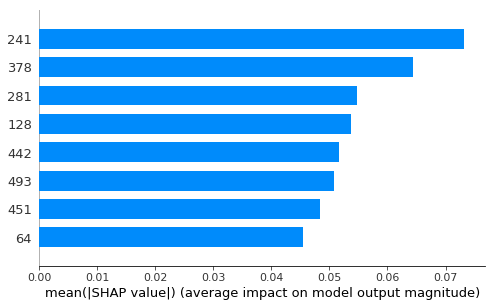

In [17]:
shap.summary_plot(shap_values[1], df, plot_type="bar")

## Generate predictions

In [18]:
test_df = pd.read_csv('../data/artificial_valid.data', sep=' ', header=None).drop(500, axis=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510
1,485,508,493,487,478,472,504,476,479,475,...,486,480,535,534,514,452,484,495,548,477
2,483,521,507,475,493,486,421,475,496,483,...,491,476,498,495,508,528,486,465,508,503
3,474,504,576,480,553,483,524,478,483,483,...,521,475,470,463,509,525,479,467,552,517
4,495,474,523,479,495,488,485,476,497,478,...,510,471,522,343,509,520,475,493,506,491


In [19]:
best_cols = [64, 128, 451, 442, 281, 241, 493, 378]
test_df = test_df[best_cols]
test_df.head()

,64,128,451,442,281,241,493,378
0,450,472,486,444,432,541,259,423
1,629,480,484,414,519,456,534,580
2,426,480,477,526,471,517,495,432
3,574,463,472,649,426,425,463,443
4,499,471,470,518,434,537,343,517


In [20]:
len(test_df)

600

In [25]:
preds = model.predict_proba(test_df)[:,1]
with open('../data/BARPAS_artificial_prediction.txt', 'w') as f:
    f.write('"BARPAS"\n')
    for p in preds:
        f.write(f'{p}\n')

In [26]:
with open('../data/BARPAS_artificial_features.txt', 'w') as f:
    f.write('"BARPAS"\n')
    for feature in best_cols:
        f.write(f'{feature}\n')